### <b>Note:</b> This is the continuation of the work on the combined customers dataframe from part 1.

# Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = "/Users/charlottelin/Documents/06-2025 Instacart Basket Analysis"

In [3]:
# Importing latest combined customers dataframe
df_final_dataframe = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combined_customers_4_9_Final.pkl'))

In [4]:
# Check output
df_final_dataframe.shape

(10000000, 35)

In [5]:
df_final_dataframe.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,Surnam,gender,state,age,date_joined,num_dependents,marital_status,income,merging_status
0,3411074,125899,1,2,20,NaN,27283,3,0,both,...,Brenda,Pennington,Female,Oklahoma,22,2019-03-22,3,married,32609,both
1,582767,131225,6,4,8,28.0,3896,3,1,both,...,Victor,Burke,Male,Alaska,19,2019-05-05,3,living with parents and siblings,50072,both
2,1648217,129928,31,1,20,10.0,37029,47,1,both,...,Adam,Fernandez,Male,Oklahoma,61,2018-03-30,0,divorced/widowed,36163,both
3,492489,93812,17,0,12,8.0,18234,22,1,both,...,Nancy,Gomez,Female,Nevada,50,2017-08-08,0,single,163081,both
4,277503,67925,2,0,13,2.0,41950,3,0,both,...,Rachel,Torres,Female,Texas,25,2019-02-19,2,married,41667,both


# Step 3 - Histogram

<Axes: ylabel='Frequency'>

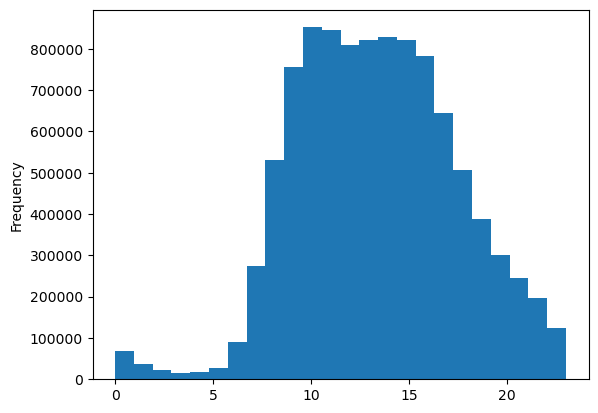

In [6]:
# Create a histogram with 'order_hour_of_day' column
df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

#### Observation: 
- Peak ordering hours occur between 9 AM and 5 PM, with the highest volume centered around 10 AM to 3 PM. These hours show a frequency above 800,000 orders, indicating strong midday activity.
- Early morning hours (0–6 AM) show minimal activity, likely due to fewer customers being active during those times.
- Evening orders (after 6 PM) gradually decline, likely due to customers engaging in other evening activities at those times.
- The distribution forms a right-skewed bell shape, with a sharp rise after 6 AM and a tapering off after 5 PM.
#### This trend suggests that Instacart users are most active in placing orders during daytime hours, potentially aligning with routine grocery planning, meal prep windows, or same-day delivery expectations. Understanding these temporal patterns is essential for optimizing delivery staffing, marketing timing, and website/app performance during peak hours.

# Step 4 - Bar Chart

<Axes: xlabel='loyalty_flag'>

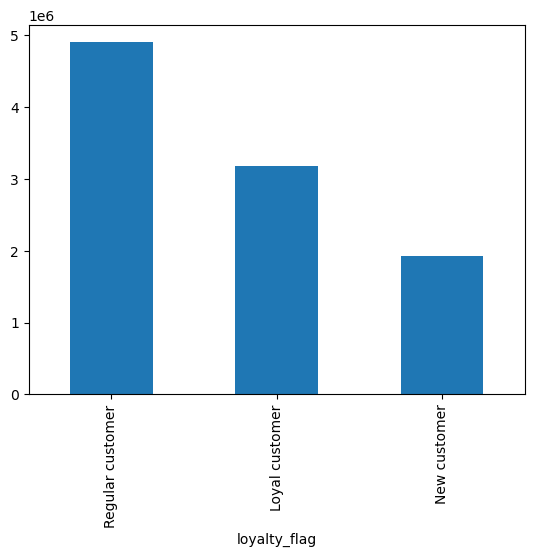

In [7]:
# Create a bar chart from the 'loyalty_flag' column
df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

In [8]:
# Get the exact count of customer loyalty tiers in my subsetted dataframe
df_final_dataframe['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    4899172
Loyal customer      3173828
New customer        1927000
Name: count, dtype: int64

#### Observations:
- The bar chart’s Y-axis shows numbers up to 5 million, while the full dataset's chart would go up to 1.6 million. That’s because:
- However, the relative shape and proportions of the bars are almost identifcal, given that my subset is random and representative.
- Regular customers = order between 10-40 products; Loyal customers = order more than 40 products; New customers = order less than 10 products.
- The bar chart shows that Regular customers place the most orders, followed by loyal customers, and then new customers.
- Regular customers account for the largest share of orders in this sample, highlighting a strong mid-tier customer base that may benefit most from targeted retention strategies.

<Axes: xlabel='loyalty_flag'>

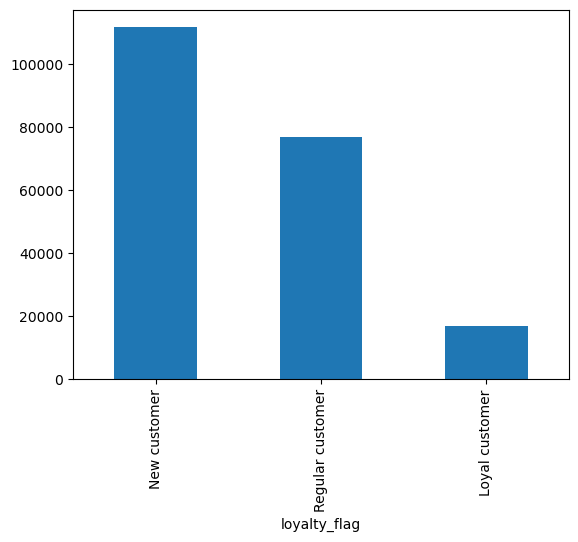

In [10]:
# Another version of the bar chart showing unique numbers of each loyalty tier
df_final_dataframe.drop_duplicates(subset='user_id')['loyalty_flag'].value_counts().plot(kind='bar')

#### Observation: This bar chart tells us "How many individual customers are loyal, regular, or new?" We can see that there are a high amount of new customers. Even if they may not purchase a lot at the beginning, this group is highly worth nurturing given the sheer number.

# Step 5 - Line Chart (Prices)

### Goal: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

#### <b>Sampling</b>

In [11]:
np.random.seed(4)

In [12]:
dev = np.random.rand(len(df_final_dataframe)) <= 0.7

In [13]:
big = df_final_dataframe[dev]

In [14]:
small = df_final_dataframe[~dev]

In [15]:
# Check output
len(big) + len(small)

10000000

In [17]:
# Narrow columns for plotting in a new variable
df_relevant_columns = small[['prices', 'order_hour_of_day']]

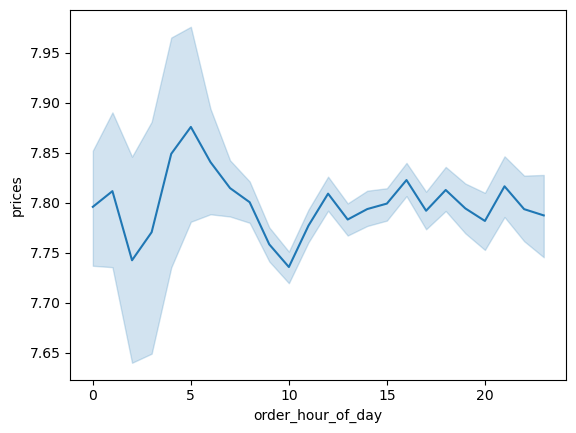

In [18]:
# Create the line chart
line = sns.lineplot(data = df_relevant_columns, x = 'order_hour_of_day', y = 'prices')

#### Observations: Yes, there is a clear difference in average spending depending on the hour of the day -
- <b>Midnight to early morning (0:00–5:00):</b> Spending peaks during these off-hours despite lower traffic. This could reflect behavior from niche user groups (such as shift workers) who may be placing higher-value or bulk orders.
- <b>Morning hours (6:00–10:00):</b> There's a noticeable dip in average prices, possibly due to users making quick, low-cost purchases on the go (e.g. breakfast items or single-product orders while commuting or starting work).
- <b>Midday to evening (11:00–23:00):</b> Prices gradually stabilize with minor fluctuations, indicating routine, steady purchasing likely driven by meal prep, replenishment, or recurring behavior.

#### Business Implications:
- Introduce targeted promotions between 6:00 and 10:00 AM to incentivize higher-value purchases during low-spend hours.
- Consider premium product recommendations or bundles for late-night users, who show a willingness to spend more per product.
- Use this insight to optimize push notifications or marketing timing, aligning high-margin offers with high-spend hours.

# Step 6 - Line Chart (Customers)

### Goal: determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

#### <b>Sampling</b>

In [19]:
np.random.seed(4)

In [20]:
dev_1 = np.random.rand(len(df_final_dataframe)) <= 0.7

In [21]:
big_1 = df_final_dataframe[dev_1]

In [22]:
small_1 = df_final_dataframe[~dev_1]

In [23]:
# Check ouput
len(big_1) + len(small_1)

10000000

In [25]:
# Narrow columns for plotting in a new variable
df_relevant_columns_1 = small[['age', 'num_dependents']]

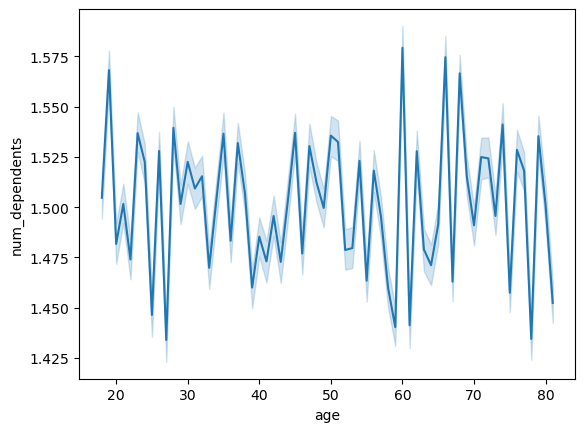

In [26]:
# Create the line chart
line_2 = sns.lineplot(data = df_relevant_columns_1, x = 'age', y = 'num_dependents')

#### Observations: 
- The line chart does not reveal a strong or consistent relationship between age and the number of dependents. The average number of dependents fluctuates irregularly across all age groups, suggesting no clear pattern. This implies that age alone is not a reliable predictor of family size or caregiving responsibilities in this customer dataset.
- Explore other demographic variables such as marital status, region, or income level to uncover more actionable segmentation patterns.
- Consider multivariate analysis to assess if combinations of factors can better explain family structure, which could inform targeted promotions for family-oriented products.

# Step 7 - Scatterplot

<Axes: xlabel='age', ylabel='income'>

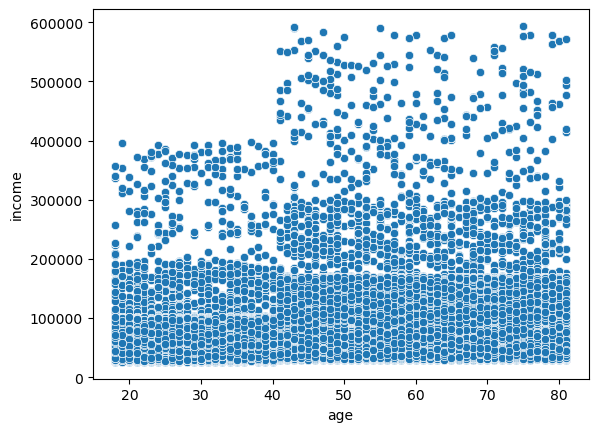

In [27]:
# Create a scatterplot for age and spending power (price)
sns.scatterplot(x = 'age', y = 'income', data = df_final_dataframe)

#### Observations: 
The scatterplot reveals a wide range of income levels across all age groups, with no clear upward or downward trend. This indicates that age is not a strong predictor of income in this customer base. High and low earners appear at every age bracket, suggesting other variables (such as occupation, region, or household size) may be more relevant for segmenting based on spending power.

# Step 8 - Export Visualizations

### Note: to ensure the exports are clean and reproducible, I will recreate some of them with a designated variable.

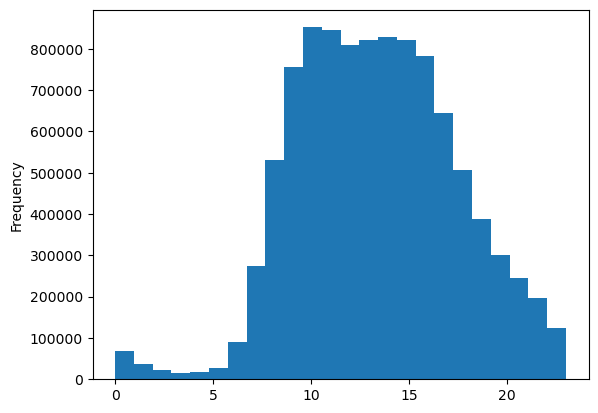

In [28]:
# Histogram
hist = df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

In [29]:
# Export
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_day.png'))

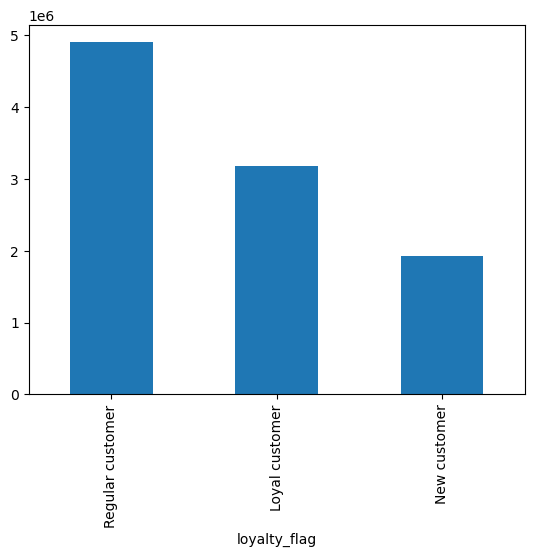

In [30]:
# Bar chart
bar = df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

In [31]:
# Export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty.png'))

In [32]:
# Line chart (Price) - no need to recreate due to previously defined variable
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_day.png'))

In [33]:
# Line chart (Customers) - no need to recreate due to previously defined variable
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

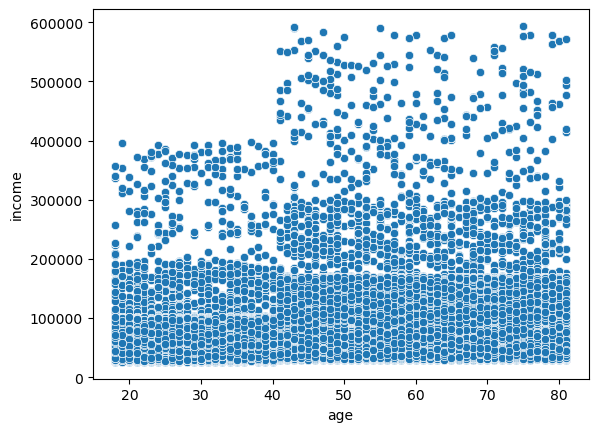

In [34]:
# Scatterplot
scat = sns.scatterplot(x = 'age', y = 'income', data = df_final_dataframe)

In [35]:
# Export
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))